In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("credit_card_fraud_10k.csv")

In [3]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [6]:
df.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [7]:
df.isnull().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

In [8]:
df["merchant_category"].unique()

array(['Electronics', 'Travel', 'Grocery', 'Food', 'Clothing'],
      dtype=object)

In [9]:
numeric_coloum = ["amount","device_trust_score","cardholder_age"]

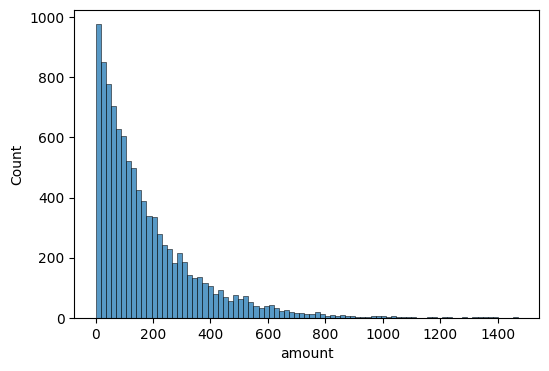

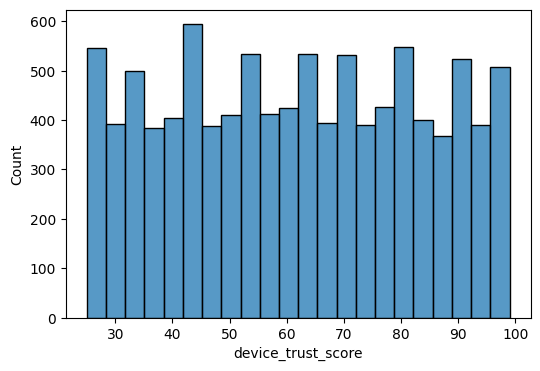

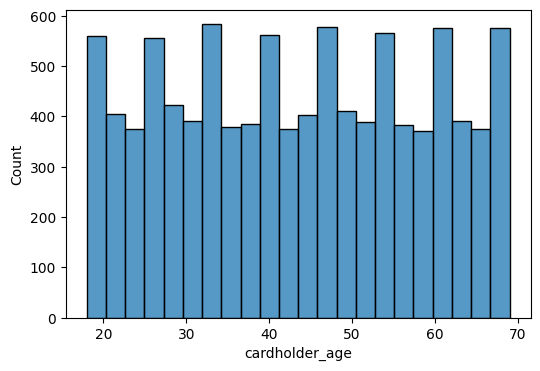

In [10]:
for n in numeric_coloum:
    fig = plt.figure(figsize=(6,4))
    sns.histplot(x = df[n])


In [11]:
correlation_matrix = df.corr(numeric_only=True)

<Axes: >

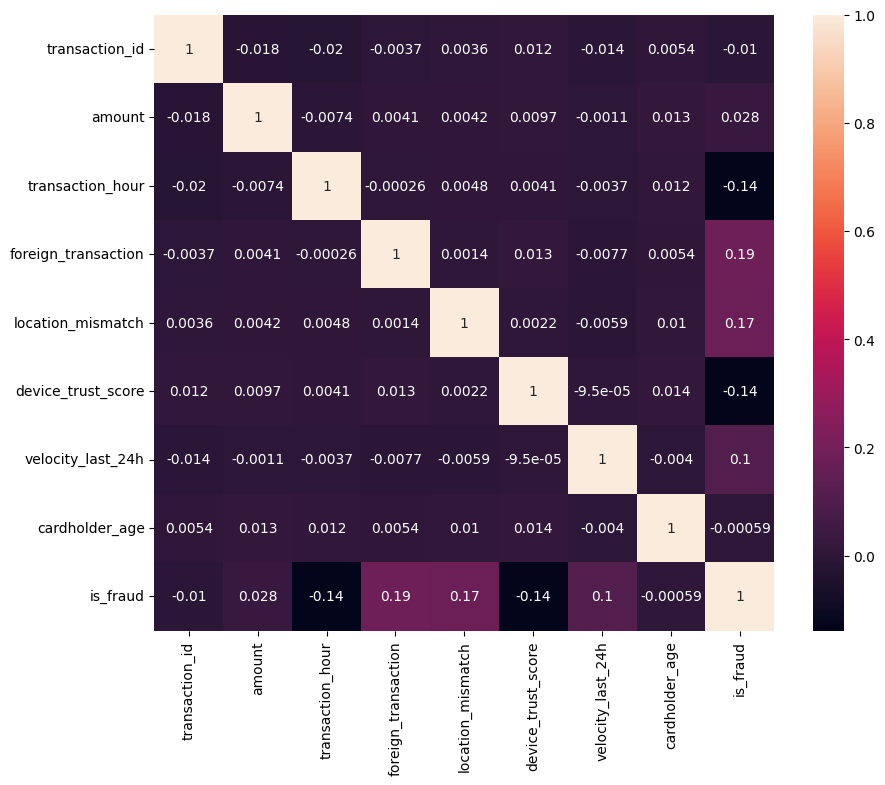

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True)

In [13]:
df_encoded = pd.get_dummies(df,dtype=int)

In [14]:
df_encoded

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Clothing,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel
0,1,84.47,22,0,0,66,3,40,0,0,1,0,0,0
1,2,541.82,3,1,0,87,1,64,0,0,0,0,0,1
2,3,237.01,17,0,0,49,1,61,0,0,0,0,1,0
3,4,164.33,4,0,1,72,3,34,0,0,0,0,1,0
4,5,30.53,15,0,0,79,0,44,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,350.91,22,0,0,99,4,37,0,0,0,1,0,0
9996,9997,410.04,5,0,0,70,3,25,0,1,0,0,0,0
9997,9998,527.75,21,0,0,44,2,45,0,0,1,0,0,0
9998,9999,91.20,2,0,0,38,0,37,0,0,1,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
X = df_encoded.drop(columns=["is_fraud","transaction_id"])
y = df_encoded["is_fraud"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [36]:
predication = model.predict(X_test)

In [37]:
acc = accuracy_score(y_test,predication)

In [38]:
acc

0.9905

In [39]:
df['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.9849
1    0.0151
Name: proportion, dtype: float64

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Testing Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print(f"RF Accuracy: {rf_model.score(X_test, y_test)}")

# Testing SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
print(f"SVM Accuracy: {svm_model.score(X_test, y_test)}")

RF Accuracy: 0.993
SVM Accuracy: 0.9845


In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 1. Initialize the model
# 'binary:logistic' is for Yes/No outcomes (like your current model)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)

# 2. Train the model
xgb_model.fit(X_train, y_train)

# 3. Predict and Score
y_pred = xgb_model.fit(X_train, y_train)
accuracy = xgb_model.score(X_test, y_test)

print(f"XGBoost Accuracy: {accuracy:.4f}")

XGBoost Accuracy: 0.9985


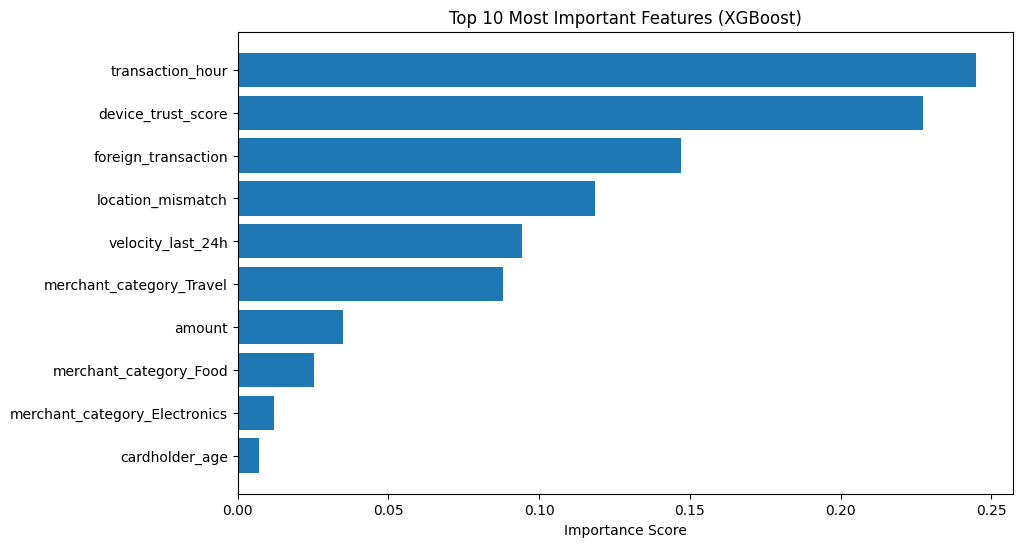

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from XGBoost
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a plot
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score

# This will run the model 5 times on different slices of data
scores = cross_val_score(xgb_model, X, y, cv=5)

print(f"All Scores: {scores}")
print(f"Average Cross-Val Accuracy: {scores.mean():.4f}")

All Scores: [0.997  0.9995 0.999  0.9985 0.9985]
Average Cross-Val Accuracy: 0.9985


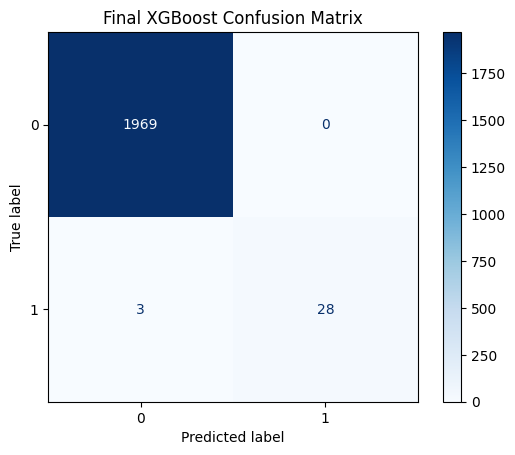

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = xgb_model.predict(X_test)

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.title('Final XGBoost Confusion Matrix')
plt.show()

In [46]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgb_fraud_model.pkl')

# Save the column names to ensure the app matches the training format
model_columns = list(X_train.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']